In [1]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt 
from scipy.stats import norm 
%matplotlib

Using matplotlib backend: MacOSX


In [4]:
ticker = 'AAPL'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2010-1-1')['Adj Close']

In [5]:
log_returns = np.log(1 + data.pct_change())

In [6]:
log_returns.tail()

,AAPL
Date,
2020-11-19,0.005155
2020-11-20,-0.011018
2020-11-23,-0.030194
2020-11-24,0.011528
2020-11-25,0.007439


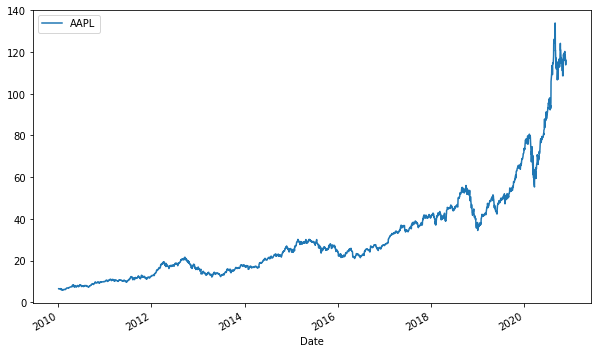

In [7]:
data.plot(figsize=(10, 6));

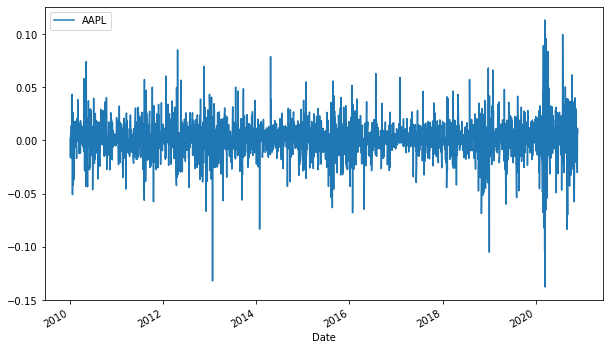

In [8]:
log_returns.plot(figsize=(10,6))

In [10]:
u = log_returns.mean()
u

AAPL    0.001048
dtype: float64

In [12]:
var = log_returns.var()
var

AAPL    0.000319
dtype: float64

Drift = u-(1/2)*var
Define drift and input the equation correctly 


In [14]:
drift = u -(0.5 * var)
drift

AAPL    0.000889
dtype: float64

In [16]:
stdev = log_returns.std()
stdev

AAPL    0.017856
dtype: float64

As we can see above these date types are floats and we need to convert them to pandas seies for simulations 

In [17]:
np.array(drift)

array([0.00088866])

In [18]:
drift.values

array([0.00088866])

In [19]:
stdev.values

array([0.0178558])

In [20]:
norm.ppf(0.95) #

1.6448536269514722

In [21]:
x = np.random.rand(10, 2)
x

array([[0.67042773, 0.23151773],
       [0.79469819, 0.181541  ],
       [0.86194315, 0.15645694],
       [0.72817578, 0.95526144],
       [0.78835353, 0.07295551],
       [0.43311418, 0.53769321],
       [0.03846595, 0.02579845],
       [0.73492781, 0.86386571],
       [0.51267807, 0.64096582],
       [0.99843584, 0.21076937]])

In [22]:
norm.ppf(x)

array([[ 0.44109455, -0.73385772],
       [ 0.82283185, -0.90950805],
       [ 1.08909112, -1.00912669],
       [ 0.60730512,  1.69816237],
       [ 0.8007214 , -1.45412729],
       [-0.16845117,  0.09462388],
       [-1.76877219, -1.94648173],
       [ 0.62778562,  1.09785325],
       [ 0.03178456,  0.36104159],
       [ 2.95483933, -0.80375455]])

In [23]:
z = norm.ppf(np.random.rand(10,2))
z

array([[-0.42359956,  0.10289801],
       [ 0.61287391,  1.61329158],
       [-0.35094598, -1.49386564],
       [-0.88771674,  1.35908831],
       [-1.1479743 , -0.73173627],
       [-0.86677258, -0.52405018],
       [ 0.65803311, -0.36717812],
       [-1.342711  , -1.29379997],
       [ 0.21825015, -0.11521913],
       [ 1.71779502, -1.55757425]])

In [24]:
t_intervals = 1000
iterations = 10

daily_returns = e^r : Where r = drift + stdev *z

In [25]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [26]:
daily_returns 

array([[1.00413761, 1.00835275, 1.01793665, ..., 1.00071231, 1.02260893,
        1.00136468],
       [0.97766673, 0.9814245 , 0.98630385, ..., 1.01937544, 0.98775833,
        0.97966676],
       [0.99813191, 0.99475035, 1.04490454, ..., 0.98958607, 0.94870534,
        1.0205814 ],
       ...,
       [1.00610801, 0.98889976, 1.01102344, ..., 0.99346342, 1.00440613,
        0.9881273 ],
       [1.00665811, 1.00069308, 1.04701468, ..., 0.99546625, 1.04006194,
        1.01016478],
       [1.03693881, 0.94023898, 1.00662813, ..., 1.01061899, 0.96515278,
        0.98311227]])

St = So * daily_returns 

In [27]:
S0 = data.iloc[-1]
S0

AAPL    116.029999
Name: 2020-11-25 00:00:00, dtype: float64

In [28]:
price_list = np.zeros_like(daily_returns)

In [29]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [30]:
price_list[0] = S0
price_list

array([[116.02999878, 116.02999878, 116.02999878, ..., 116.02999878,
        116.02999878, 116.02999878],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [31]:
for t in range(1, t_intervals): 
    price_list[t] = price_list[t -1] * daily_returns[t]

In [32]:
price_list

array([[ 116.02999878,  116.02999878,  116.02999878, ...,  116.02999878,
         116.02999878,  116.02999878],
       [ 113.43866898,  113.87468321,  114.44083438, ...,  118.27813157,
         114.60959733,  113.67073299],
       [ 113.22675555,  113.27688135,  119.57974772, ...,  117.04639186,
         108.7307367 ,  116.01023602],
       ...,
       [ 633.80904377,  123.29577954,  121.10541497, ...,  400.35220538,
         975.83410111,   96.51258977],
       [ 638.02901684,  123.38123353,  126.79914729, ...,  398.53710797,
        1014.92790487,   97.49361915],
       [ 661.59705099,  116.00784549,  127.63958887, ...,  402.76916887,
         979.56048689,   95.84717275]])

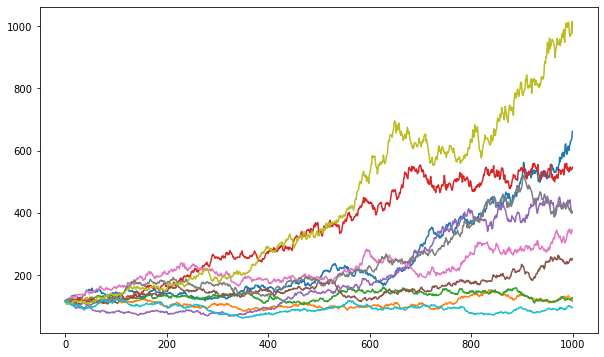

In [35]:
plt.figure(figsize=(10,6))
plt.plot(price_list);